In [10]:
import numpy as np
import numpy.typing as npt
from PIL import Image
from datasets import load_dataset
from albumentations import Resize
import matplotlib.pyplot as plt

from dual import NeuralNetwork

In [11]:
def transform_image(image: Image) -> npt.NDArray:
    image = np.array(image) # to numpy
    image = Resize(width=12, height=12)(image=image)["image"] # resize
    image = image / 255 # normalize
    image = image.flatten() # flatten
    return image

def one_hot_encode_label(label: int) -> int:
    result = np.zeros(10)
    result[label] = 1
    return result

def transform(batch):
    batch["input"] = [transform_image(image) for image in batch["input"]]
    batch["label"] = [one_hot_encode_label(label) for label in batch["label"]]
    return batch


ds = (
    load_dataset("mnist", keep_in_memory=True)
    .with_transform(transform=transform)
    .rename_column(original_column_name="image", new_column_name="input")
)

dstrain = ds["train"]

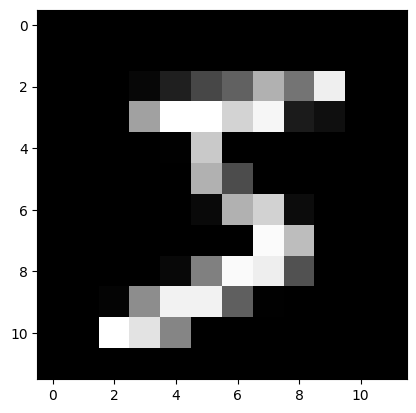

In [15]:
plt.imshow(ds["train"][0]["input"].reshape(12, 12), cmap="grey")

In [16]:
def relu(x):
    return np.maximum(x, 0)

def cross_entropy(x, y):
    return -1*np.sum(y * np.log(x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

model = NeuralNetwork(input_size=12*12, loss_function=cross_entropy)
model.add_layer(n_neurons=20, activation_function=relu, initialize="He")
model.add_layer(n_neurons=10, activation_function=softmax, initialize="Xavier")

model.train(data=ds["train"],
            learning_rate=0.1,
            epochs=1,
            validation_data=ds["test"])


EPOCH 1:  10%|█         | 6186/60000 [1:10:28<10:13:04,  1.46it/s, loss=0.457, validation_accuracy=0.85]   


KeyboardInterrupt: 

In [17]:
model.accuracy(ds["test"])

0.844